In [2]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [11]:
def read_data_files(directory, df = pd.DataFrame()):
    for fn in glob.glob(os.path.join(directory, "*.csv")):
        tmp = pd.read_csv(fn, header=0)
        df = df.append(tmp, ignore_index=True)
    return df

In [94]:
def derive_metrics(df):
    df = df.groupby(["objsize", "qdepth", "mode", "runid"]).agg({'begin': np.min,'end': np.max, 'objsize': np.sum})
    df["dur"] = (df["end"] - df["begin"]) / 1000000000.0
    df["rate"] = (df["objsize"] / 2.0**20) / df["dur"]
    del df["begin"]
    del df["end"]
    del df["objsize"]
    return df

def plot_server_speedup(df):
    df = df.reset_index().groupby(["objsize", "qdepth", "mode"]).mean()
    df = df.unstack()
    speedup = df["dur"]["client"] / df["dur"]["server"] - 1.0
    ax = speedup.unstack(level=0).plot.bar()
    ax.set_title("Server vs Client Copy")
    ax.set_ylabel("Speedup")
    ax.set_xlabel("Queue Depth")
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x + 1.0))
    
def plot_net_bandwidth(df):
    df = df.reset_index().groupby(["objsize", "qdepth", "mode"]).mean()
    df = df.unstack()
    return df

In [85]:
df = read_data_files("expr1")
df = read_data_files("expr2", df)

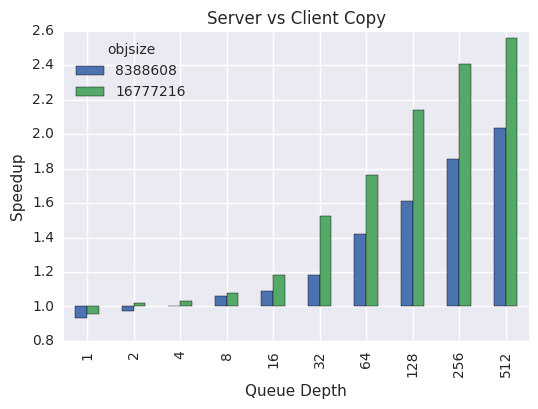

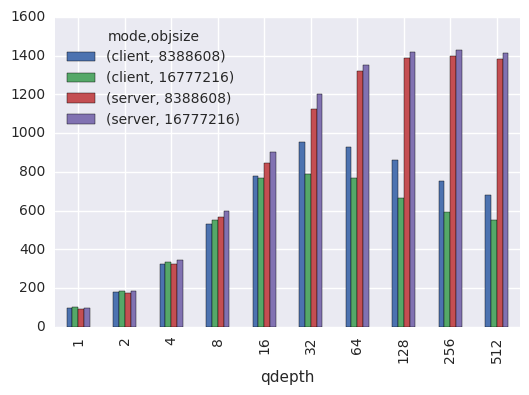

In [112]:
df2 = derive_metrics(df)
plot_server_speedup(df2)
df3 = plot_net_bandwidth(df2)
#df3["rate"].plot.bar()
df3["rate"].unstack(level=0).plot.bar()